In [77]:
import numpy as np
import pandas as pd

In [78]:
df=pd.read_csv("athlete_events.csv")
region_df=pd.read_csv("noc_regions.csv")

In [79]:
df.tail(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [80]:
df.shape

(271116, 15)

In [81]:
df=df[df['Season']=='Summer']

In [82]:
df.shape

(222552, 15)

In [83]:
df.tail(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN


In [84]:
df=df.merge(region_df,on='NOC',how='left')

In [85]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [86]:
df.duplicated().sum()

1385

In [87]:
df.drop_duplicates(inplace=True)

In [88]:
df=pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [89]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False


In [90]:
medal_tally=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [91]:
medal_tally=medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [92]:
medal_tally['total']=medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze']

In [93]:
medal_tally

,NOC,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,URS,394,317,294,1005
2,GBR,278,317,300,895
3,GER,235,261,283,779
4,FRA,234,256,287,777
...,...,...,...,...,...
225,AHO,0,1,0,1
226,LBR,0,0,0,0
227,LCA,0,0,0,0
228,LES,0,0,0,0


In [94]:
years=df['Year'].unique().tolist()

In [95]:
years.sort()

In [96]:
years.insert(0,'Overall')

In [97]:
country=np.unique(df['region'].dropna().values).tolist()

In [98]:
country.sort()

In [99]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [100]:
country.insert(0,'Overall')

In [101]:
def fetch_medal_tally(df,year,country):
    medal_df=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag=0
    if year=='Overall' and country=='Overall':
        temp_df=medal_df
    if year=='Overall' and country!='Overall':
        flag=1
        temp_df=medal_df[medal_df['region']==country]
    if year!='Overall' and country=='Overall':
        temp_df=medal_df[medal_df['Year']==int(year)]
    if year!='Overall' and country!='Overall':
        temp_df=medal_df[medal_df['Year']==int(year) & (medal_df['region']==country)]

    if flag==1:
        x=temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x=temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    x['total']=x['Gold']+x['Silver']+x['Bronze']
    print(x)

In [102]:
fetch_medal_tally(df,year='Overall',country='Overall')

            region  Gold  Silver  Bronze  total
0              USA  1035     802     708   2545
1           Russia   592     498     487   1577
2          Germany   444     457     491   1392
3               UK   278     317     300    895
4           France   234     256     287    777
..             ...   ...     ...     ...    ...
200        Lesotho     0       0       0      0
201        Albania     0       0       0      0
202          Libya     0       0       0      0
203  Liechtenstein     0       0       0      0
204        Liberia     0       0       0      0

[205 rows x 5 columns]


In [103]:
df['Year'].unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896], dtype=int64)

In [104]:
nations_over_time=df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index()

In [105]:
nations_over_time.rename(columns={'index':'Edition','Year':'No of countries'},inplace=True)

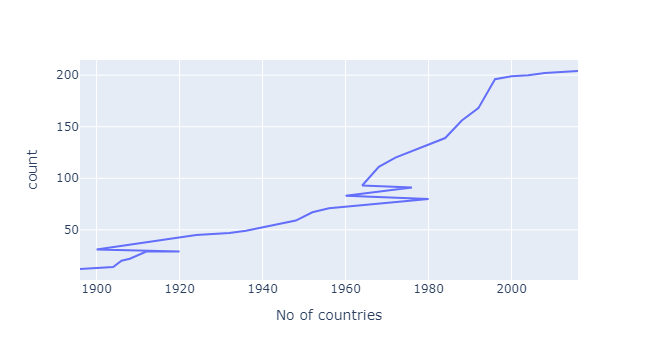

In [106]:
import plotly.express as px
fig=px.line(nations_over_time,x="No of countries",y="count")
fig.show()

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Year', ylabel='Sport'>

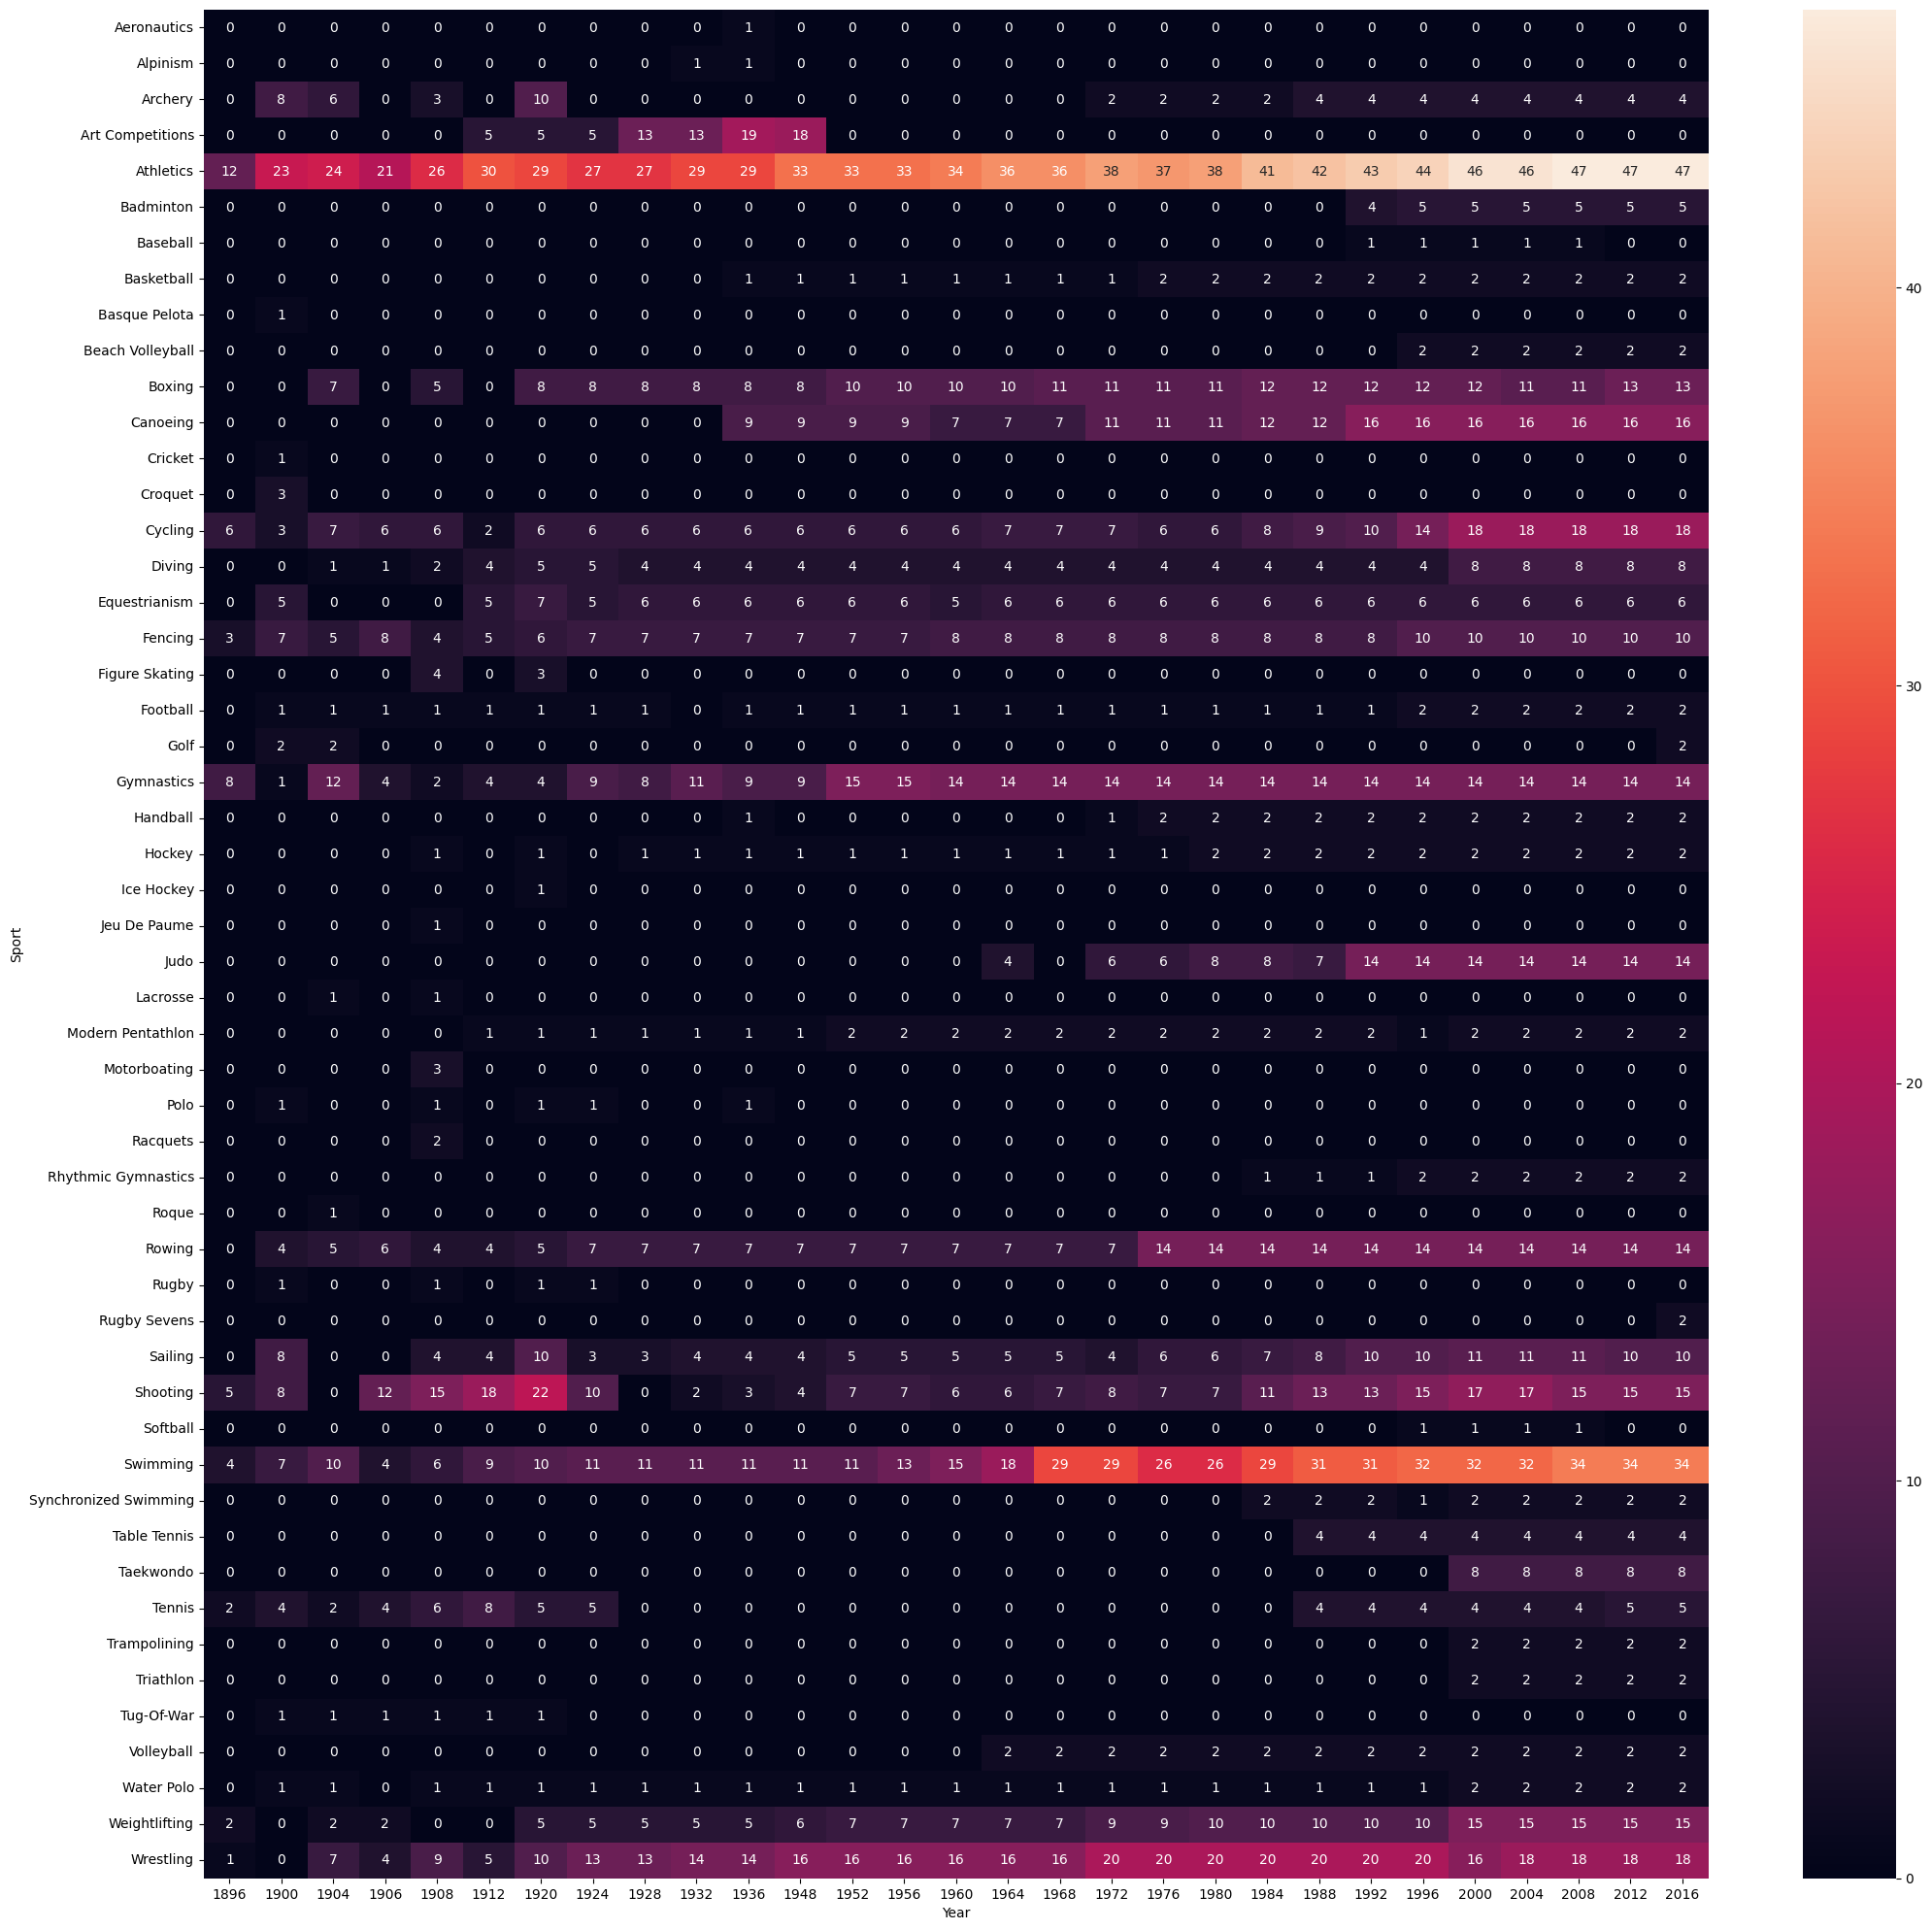

In [110]:
plt.figure(figsize=(25,25))
x=df.drop_duplicates(['Year','Sport','Event'])
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [119]:
def most_successful(df,sport):
    temp_df=df.dropna(subset=["Medal"])
    if sport !="Overall":
        temp_df=temp_df[temp_df['Sport']==sport]
    return temp_df['Name'].value_counts().head(15)

In [120]:
most_successful(df,'Overall')

Name
Michael Fred Phelps, II                            28
Larysa Semenivna Latynina (Diriy-)                 18
Nikolay Yefimovich Andrianov                       15
Borys Anfiyanovych Shakhlin                        13
Takashi Ono                                        13
Edoardo Mangiarotti                                13
Dara Grace Torres (-Hoffman, -Minas)               12
Aleksey Yuryevich Nemov                            12
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)    12
Birgit Fischer-Schmidt                             12
Ryan Steven Lochte                                 12
Paavo Johannes Nurmi                               12
Sawao Kato                                         12
Natalie Anne Coughlin (-Hall)                      12
Matthew Nicholas "Matt" Biondi                     11
Name: count, dtype: int64

In [116]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,False,False,False
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,False,False,False
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,False,False,False
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,False,False,False


In [122]:
temp_df=df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

C:\Users\agarw\AppData\Local\Temp\ipykernel_6108\1749264335.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
new_df=temp_df[temp_df['region']=='USA']
final_df=new_df.groupby('Year').count()['Medal'].reset_index()


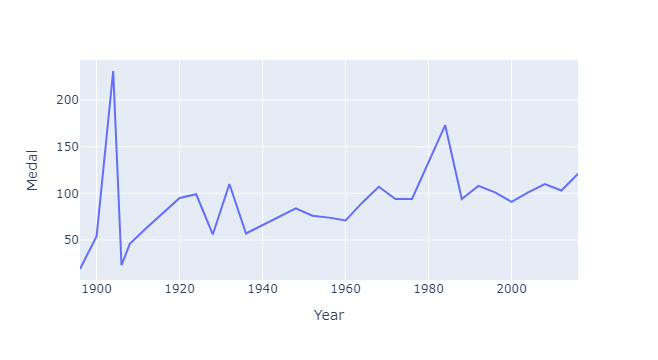

In [132]:
fig=px.line(final_df,x="Year",y="Medal")
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

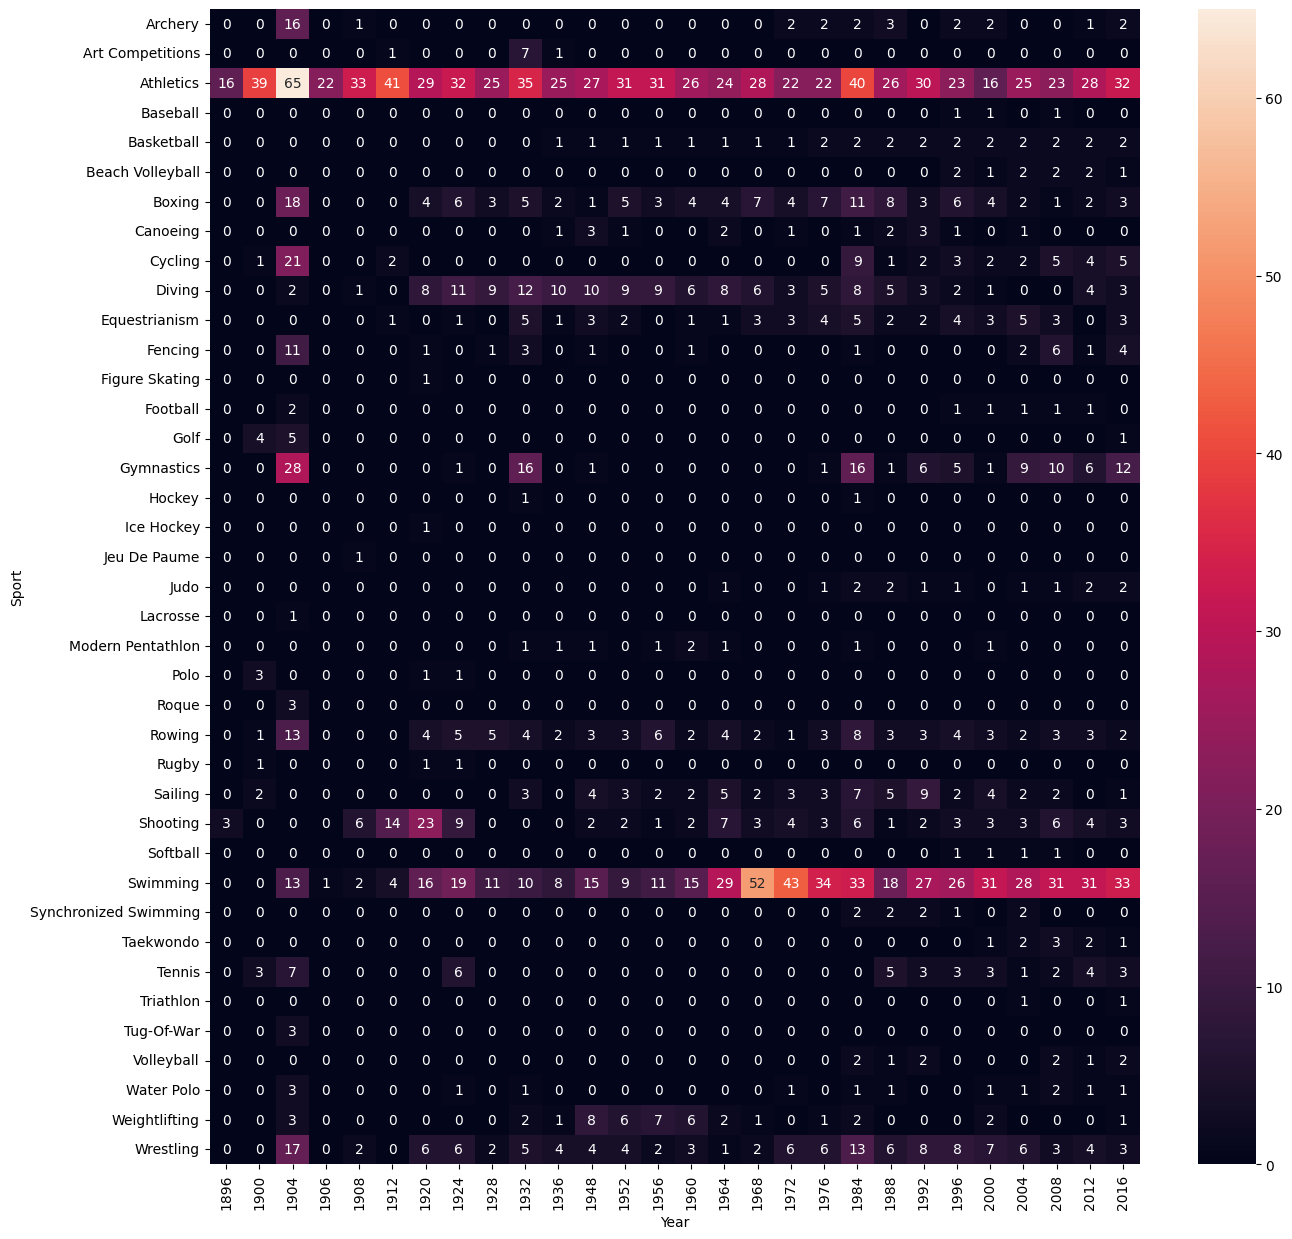

In [135]:
plt.figure(figsize=(15,15))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [136]:
import plotly.figure_factory as ff

In [138]:
athlete_df=df.drop_duplicates(subset=['Name','region'])

In [141]:
x1=athlete_df['Age'].dropna()
x2=athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3=athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4=athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

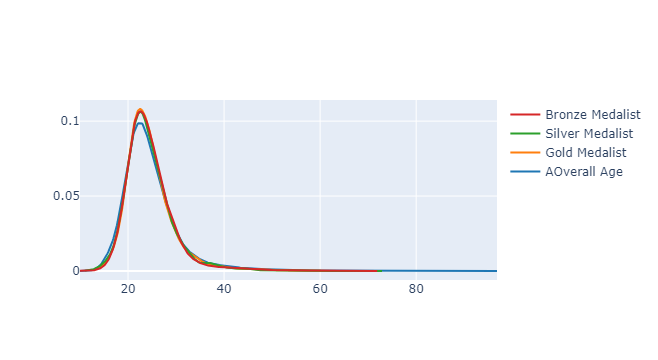

In [143]:
fig=ff.create_distplot([x1,x2,x3,x4],['AOverall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()